In [26]:
import importlib
import data_cleaning
importlib.reload(data_cleaning)
import data_visualization_fran
importlib.reload(data_visualization_fran)
import data_visualization_kira
importlib.reload(data_visualization_kira)

<module 'data_visualization_kira' from 'c:\\Users\\Francisco\\tech_projects\\ECE143_Project\\heart-disease-analysis\\SubmissionFiles\\data_visualization_kira.py'>

In [45]:
cleaned_data = data_cleaning.main()

Num rows before cleaning: 10000
Num of cols before cleaning: 21

Num of rows after cleaning with DROP: 7067
Num of cols after cleaning with DROP: 21
Duplicate rows in cleaned DROP: 0

Num of rows after cleaning with KNN: 10000
Num of cols after cleaning with KNN: 21
Duplicate rows in cleaned KNN: 0

Gender
Male      3564
Female    3503
Name: count, dtype: int64

Number of men in clean with DROP: 3564
Number of women in clean with DROP: 3503

Gender
Male      5022
Female    4978
Name: count, dtype: int64

Number of men in clean with KNN: 5022
Number of women in clean with KNN: 4978
Heart Disease Status
No     2000
Yes    2000
Name: count, dtype: int64


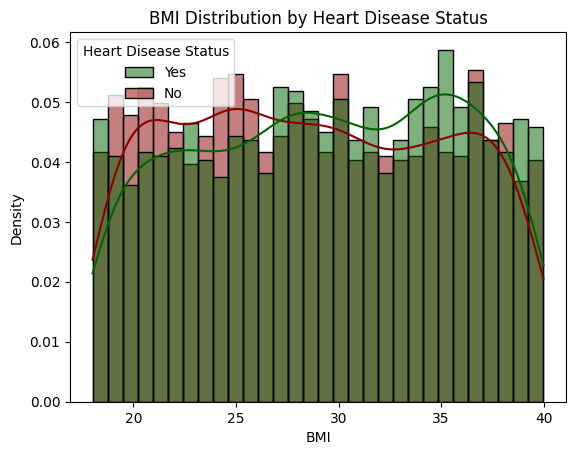

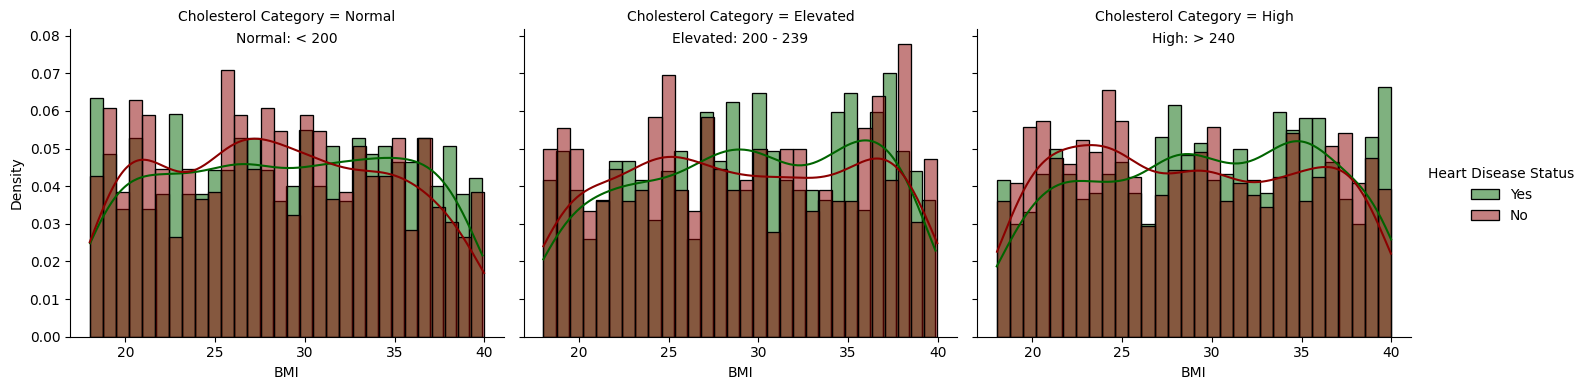

In [46]:
data_visualization_fran.create_histoplot(cleaned_data, "BMI", "Heart Disease Status")
data_visualization_fran.create_histoplot(cleaned_data, "BMI", "Heart Disease Status", cat="Cholesterol Category")

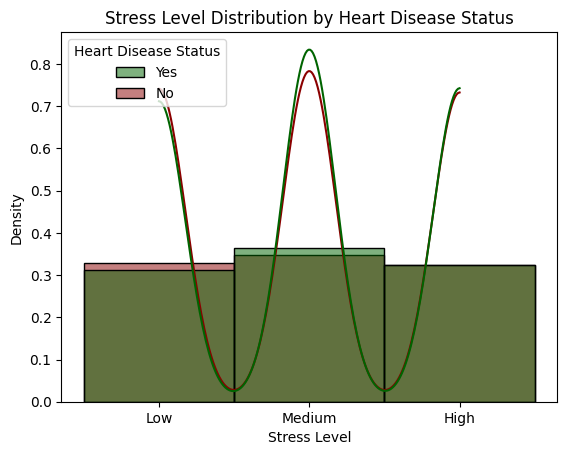

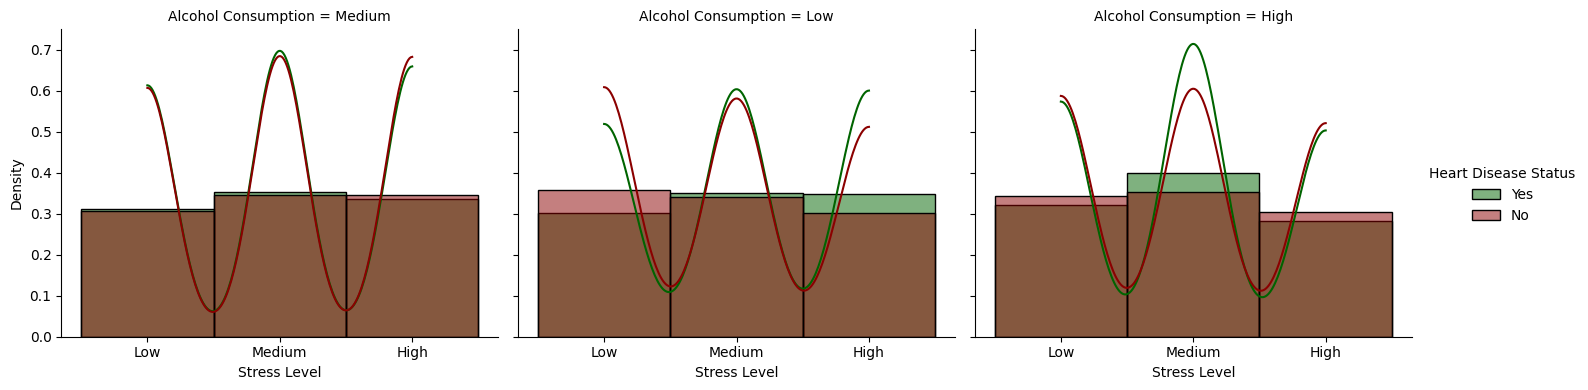

In [47]:
data_visualization_fran.create_histoplot(cleaned_data, "Stress Level", "Heart Disease Status")
data_visualization_fran.create_histoplot(cleaned_data, "Stress Level", "Heart Disease Status", cat="Alcohol Consumption")

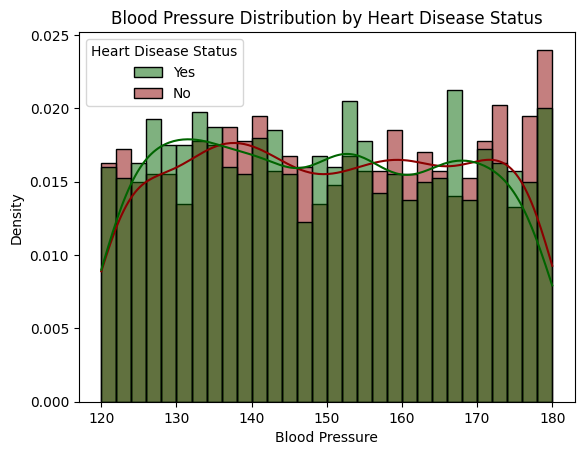

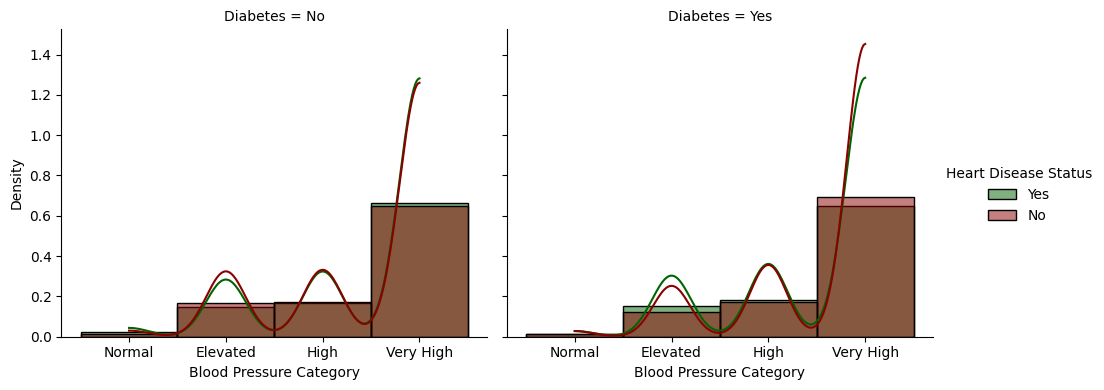

In [30]:
data_visualization_fran.create_histoplot(cleaned_data, "Blood Pressure", "Heart Disease Status")
data_visualization_fran.create_histoplot(cleaned_data, "Blood Pressure Category", "Heart Disease Status", cat="Diabetes")